# Life Expectancy Case Study

### In the previous session, we focused on EDA, data preparation for modeling and training and evaluating a model. We also introduced statsmodels OLS.

### In this session, we will focus on data preprocessing, linear regression assumptions, and interpreting the model.

## Context 
    
Many studies have been undertaken in the past on factors affecting life expectancy, considering demographic variables, income composition, and mortality rates. It was found that the effect of immunization and human development index was not taken into account in the past studies, and important immunizations like Hepatitis B, Polio, and Diphtheria should also be taken into account. In this case study, we will consider immunization factors, mortality factors, economic factors, social factors, and other health-related factors and use linear regression to see the effect of those factors on Life Expectancy.


## Objective
To analyze the data and build a linear regression model that can predict the life expectancy of the people of a country.


## Key Questions

- Does life expectancy have a positive or negative correlation with the different factors (immunization, mortality, socio-economic, etc.) taken into consideration for the countries?
- Can we build a linear model to predict life expectancy? If yes, how accurate will the model be?
- What are the predictive variables actually affecting life expectancy?


## Data Description

The dataset contains immunization factors, mortality factors, economic factors, social factors, and other health-related factors for different countries across different years.

**Data Dictionary**

- Country: Country
- Year: Year
- Status: Developed or Developing status
- Life expectancy: Life Expectancy in years
- Adult Mortality: Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)
- Infant deaths: Number of Infant Deaths per 1000 population
- Alcohol: Alcohol, recorded per capita (15+) consumption (in liters of pure alcohol)
- percentage expenditure: Expenditure on health as a percentage of Gross Domestic Product per capita(%)
- Hepatitis B: Hepatitis B (HepB) immunization coverage among 1-year-olds (%)
- Measles: number of reported cases of Measles per 1000 population
- BMI: Average Body Mass Index of the entire population
- under-five deaths: Number of under-five deaths per 1000 population
- Polio: Polio (Pol3) immunization coverage among 1-year-olds (%)
- Total expenditure: General government expenditure on health as a percentage of total government expenditure (%)
- Diphtheria: Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)
- HIV/AIDS: Deaths per 1000 live births due to HIV/AIDS (0-4 years)
- GDP: Gross Domestic Product per capita (in USD)
- Population: Population of the country
- thinness  1-19 years: Prevalence of thinness among children and adolescents for Age 10 to 19 (% )
- thinness 5-9 years: Prevalence of thinness among children for Age 5 to 9(%)
- Income composition of resources: Human Development Index in terms of income composition of resources (index ranging from 0 to 1)
- Schooling: Number of years of schooling

## Let's start coding!

### Importing necessary libraries

In [180]:
# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# to split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# to build linear regression_model using statsmodels
import statsmodels.api as sm

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

In [181]:
# loading the dataset
data = pd.read_csv("Life Expectancy Data.csv")

<IPython.core.display.Javascript object>

### Data Overview

In [182]:
data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,Infant deaths,Alcohol,Percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 1-19 years,Thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.000,263.000,62,0.010,71.280,65.000,1154,...,6.000,8.160,65.000,0.100,584.259,33736494.000,17.200,17.300,0.479,10.100
1,Afghanistan,2014,Developing,59.900,271.000,64,0.010,73.524,62.000,492,...,58.000,8.180,62.000,0.100,612.697,327582.000,17.500,17.500,0.476,10.000
2,Afghanistan,2013,Developing,59.900,268.000,66,0.010,73.219,64.000,430,...,62.000,8.130,64.000,0.100,631.745,31731688.000,17.700,17.700,0.470,9.900
3,Afghanistan,2012,Developing,59.500,272.000,69,0.010,78.184,67.000,2787,...,67.000,8.520,67.000,0.100,669.959,3696958.000,17.900,18.000,0.463,9.800
4,Afghanistan,2011,Developing,59.200,275.000,71,0.010,7.097,68.000,3013,...,68.000,7.870,68.000,0.100,63.537,2978599.000,18.200,18.200,0.454,9.500


<IPython.core.display.Javascript object>

In [183]:
# check number of rows and columns
data.shape

(2938, 22)

<IPython.core.display.Javascript object>

* The dataset has 2938 rows and 22 columns. 

In [184]:
# checking column datatypes and number of non-null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   Infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   Percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2904 non-null   float64
 11  Under-five deaths                2938 non-null   int64  
 12  Polio               

<IPython.core.display.Javascript object>

**Observations**
* There are 2938 rows and 22 columns.
* Column names have spaces and spacial characters which we will fix.
* *Status* is categorical variable and all other variables are numerical type.
* Dependent variable is *Life expectancy*.

In [185]:
# let's create a copy of the data to avoid any changes to original data
df = data.copy()

<IPython.core.display.Javascript object>

**The column names have spaces in them, so let's fix them.**

In [186]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'Infant deaths', 'Alcohol', 'Percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'Under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'Thinness  1-19 years',
       'Thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

<IPython.core.display.Javascript object>

In [187]:
df.columns = [
    col.replace(" ", "_").replace("/", "_").replace("-", "_") for col in df.columns
]
# df.columns = [col.replace("/", "_") for col in df.columns]
# df.columns = [col.replace("-", "_") for col in df.columns]

<IPython.core.display.Javascript object>

In [188]:
df.columns

Index(['Country', 'Year', 'Status', 'Life_expectancy', 'Adult_Mortality',
       'Infant_deaths', 'Alcohol', 'Percentage_expenditure', 'Hepatitis_B',
       'Measles', 'BMI', 'Under_five_deaths', 'Polio', 'Total_expenditure',
       'Diphtheria', 'HIV_AIDS', 'GDP', 'Population', 'Thinness__1_19_years',
       'Thinness_5_9_years', 'Income_composition_of_resources', 'Schooling'],
      dtype='object')

<IPython.core.display.Javascript object>

## Data Preprocessing

### Missing Value Treatment

In [189]:
# checking for missing values
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life_expectancy                     10
Adult_Mortality                     10
Infant_deaths                        0
Alcohol                            194
Percentage_expenditure               0
Hepatitis_B                        553
Measles                              0
BMI                                 34
Under_five_deaths                    0
Polio                               19
Total_expenditure                  226
Diphtheria                          19
HIV_AIDS                             0
GDP                                448
Population                         652
Thinness__1_19_years                34
Thinness_5_9_years                  34
Income_composition_of_resources    167
Schooling                          163
dtype: int64

<IPython.core.display.Javascript object>

**Let's fix the missing values.**

- For the target variable (*Life_expectancy*), we will drop the missing values.
- For the predictor variables, we will replace the missing values in each column with its median.

In [190]:
df.dropna(subset=["Life_expectancy"], inplace=True)

<IPython.core.display.Javascript object>

In [191]:
num_cols = df.select_dtypes(include=np.number).columns.tolist()

## Please don't do this, it's hard to read, and reinvents the wheel

# medianFiller = lambda x: x.fillna(x.median())
# df[num_cols] = df[num_cols].apply(medianFiller, axis=0)


# Instead . . .
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

<IPython.core.display.Javascript object>

In [198]:
# checking the number of missing values
df.isnull().sum()

Country                            0
Year                               0
Status                             0
Life_expectancy                    0
Adult_Mortality                    0
Infant_deaths                      0
Alcohol                            0
Percentage_expenditure             0
Hepatitis_B                        0
Measles                            0
BMI                                0
Under_five_deaths                  0
Polio                              0
Total_expenditure                  0
Diphtheria                         0
HIV_AIDS                           0
GDP                                0
Population                         0
Thinness__1_19_years               0
Thinness_5_9_years                 0
Income_composition_of_resources    0
Schooling                          0
dtype: int64

<IPython.core.display.Javascript object>

- All the missing values have been treated.

In [199]:
# Let's look at the statistical summary of the data
pd.set_option(
    "display.float_format", lambda x: "%.3f" % x
)  # to display numbers rounded off to 3 decimal places

df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Country,2928,183,Afghanistan,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,2928.000,NaN,NaN,NaN,2007.500,4.611,2000.000,2003.750,2007.500,2011.250,2015.000
Status,2928,2,Developing,2416,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Life_expectancy,2928.000,NaN,NaN,NaN,69.225,9.524,36.300,63.100,72.100,75.700,89.000
Adult_Mortality,2928.000,NaN,NaN,NaN,164.796,124.292,1.000,74.000,144.000,228.000,723.000
Infant_deaths,2928.000,NaN,NaN,NaN,30.407,118.114,0.000,0.000,3.000,22.000,1800.000
Alcohol,2928.000,NaN,NaN,NaN,4.559,3.921,0.010,1.108,3.770,7.400,17.870
Percentage_expenditure,2928.000,NaN,NaN,NaN,740.321,1990.931,0.000,4.854,65.611,442.614,19479.912
Hepatitis_B,2928.000,NaN,NaN,NaN,83.046,22.942,1.000,82.000,92.000,96.000,99.000
Measles,2928.000,NaN,NaN,NaN,2427.856,11485.971,0.000,0.000,17.000,362.250,212183.000


<IPython.core.display.Javascript object>

**Observations**

- The *Status* column has 2 unique values - "*Developing*" and "*Developed*"
- The *Country* column has 183 unique values, i.e., the data is collected from 183 countries.
- *Year* ranges from 2000 to 2015.
- Average *Life expectancy* is ~69 years.

**Before we further process the data, let's have a look at the graphical visualization of the data to understand it in a better way!**

## EDA

### Univariate analysis

In [200]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

**Let's explore the dependent variable *Life expectancy***

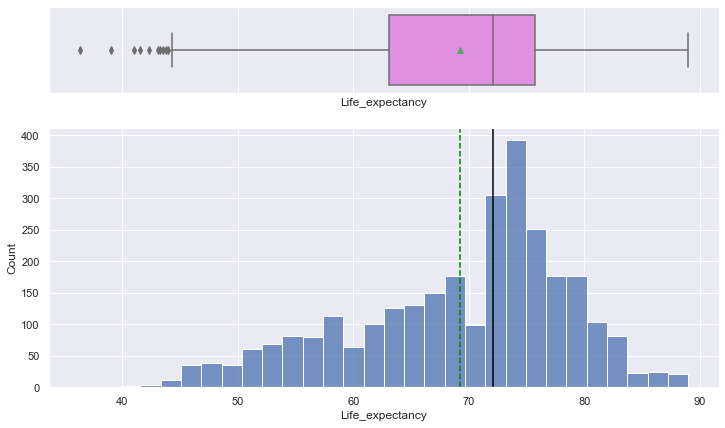

<IPython.core.display.Javascript object>

In [201]:
histogram_boxplot(df, "Life_expectancy")

**Observations**

- *Life_expectancy* is left skewed, which means some countries have low life expectancy.
- Mean life expectancy is around 70 years.

**Let's explore per capita alcohol consumption**

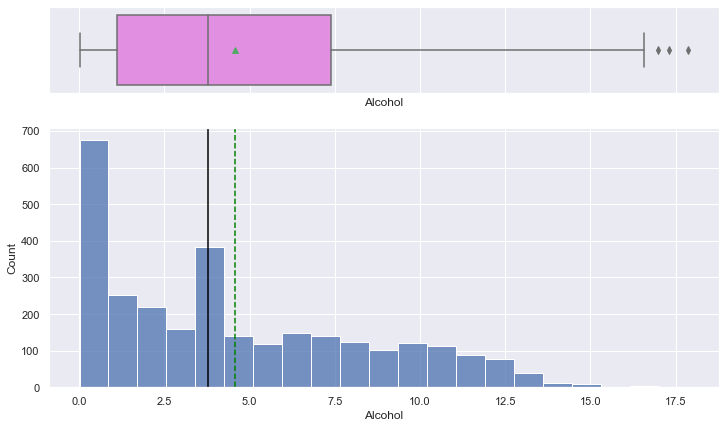

<IPython.core.display.Javascript object>

In [202]:
histogram_boxplot(df, "Alcohol")

**Observations**

* The median alcohol consumption is 3.75 litres.
* There are some outliers where average alcohol consumption is more than 15 litres.
* The distribution is right-skewed.

**Let's explore GDP**

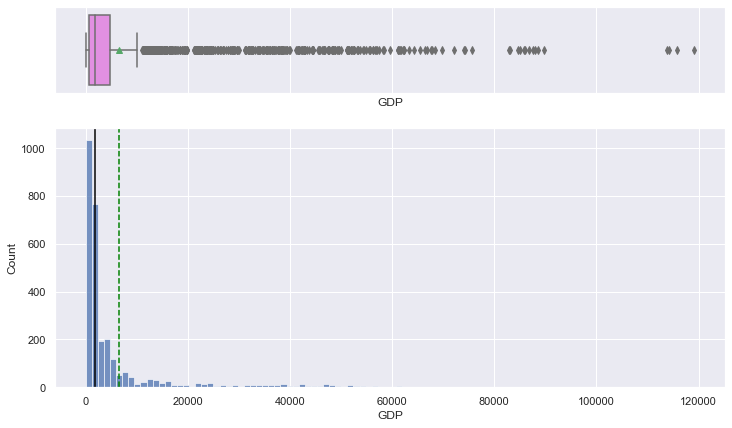

<IPython.core.display.Javascript object>

In [205]:
histogram_boxplot(df, "GDP", bins=100)

**Observations**

* The distribution of GDP is heavily skewed to the right.
* The outliers to the right indicate that many countries have a very high GDP.

In [206]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

In [209]:
df["Status"].value_counts(normalize=True)

Developing   0.825
Developed    0.175
Name: Status, dtype: float64

<IPython.core.display.Javascript object>

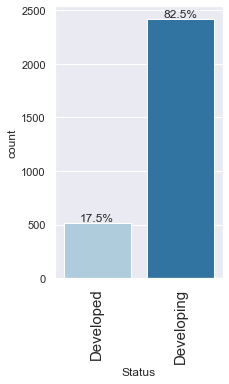

<IPython.core.display.Javascript object>

In [207]:
labeled_barplot(df, "Status", perc=True)

- More than 80% of the countries in the data are developing countries.

### Bivariate Analysis

**Let's look at correlations.**

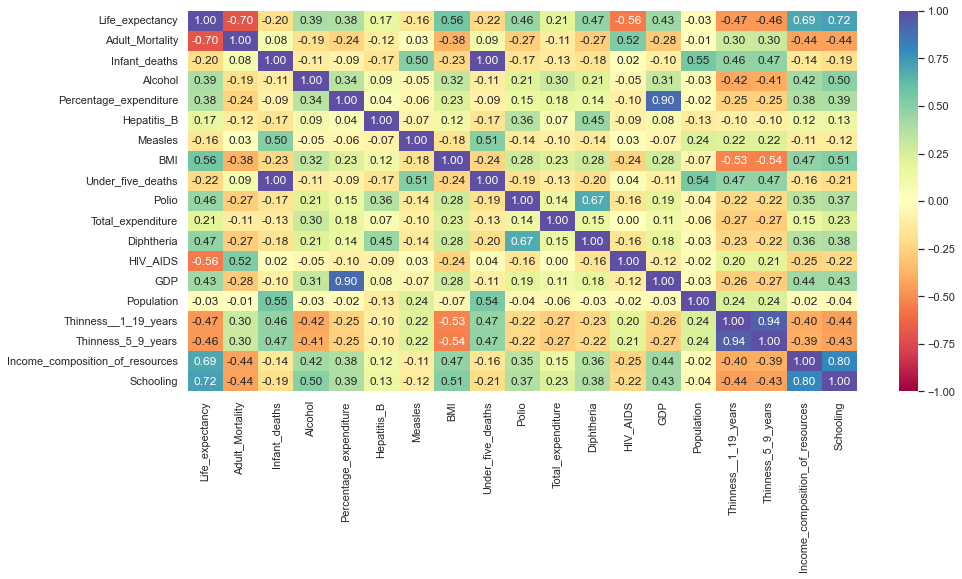

<IPython.core.display.Javascript object>

In [210]:
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
numeric_columns.remove(
    "Year"
)  # dropping year column b/c Year is not changeable w.r.t. other input variables

# correlation heatmap
plt.figure(figsize=(15, 7))
sns.heatmap(
    df[numeric_columns].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral",
)
plt.show()

<AxesSubplot:>

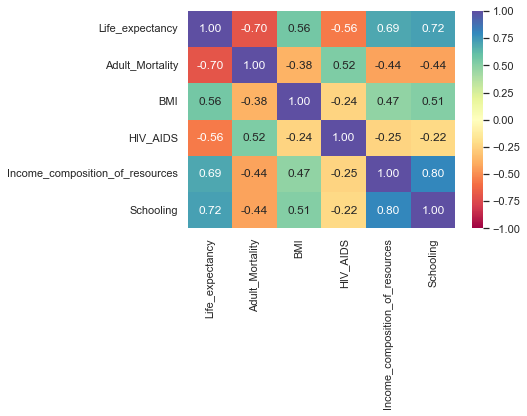

<IPython.core.display.Javascript object>

In [221]:
cols_of_interest = df.corr()["Life_expectancy"].abs() > 0.5
smaller_df_corr = df.corr().loc[cols_of_interest, cols_of_interest]
sns.heatmap(
    smaller_df_corr, annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral",
)

**Observations**

* *Life_expectancy* is highly negatively correlated with *Adult_Mortality* and *HIV_AIDs*, which means that as adult mortality and HIV death (0-4 years) increases, life expectancy tends to decrease.

* *Life_expectancy* is highly positively correlated with *Schooling* and *Income_composition_of_resources*, which means that as schooling years of citizens in a country and income composition of resources increases, life expectancy tends to increase.

**Let's look at the graphs of a few variables that are highly correlated with *Life_expectancy*.**

***Life_expectancy* vs *HIV_AIDS* vs *Status***

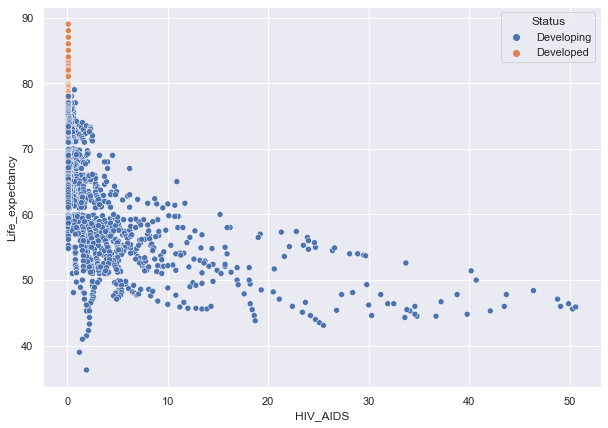

<IPython.core.display.Javascript object>

In [211]:
plt.figure(figsize=(10, 7))
sns.scatterplot(y="Life_expectancy", x="HIV_AIDS", hue="Status", data=df)
plt.show()

* Developed countries have very low cases of HIV_AIDS.

***Life_expectancy* vs *Schooling* vs *Status***

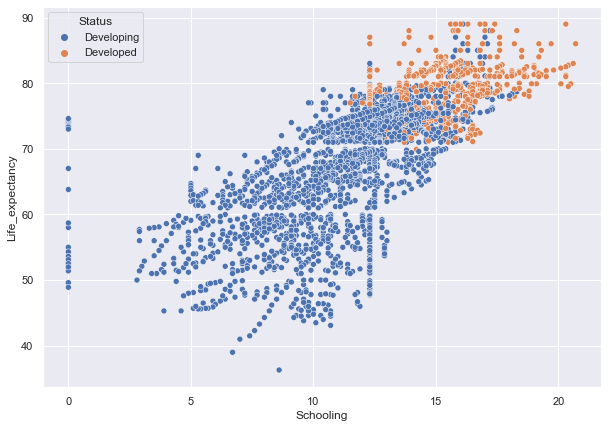

<IPython.core.display.Javascript object>

In [226]:
plt.figure(figsize=(10, 7))
sns.scatterplot(y="Life_expectancy", x="Schooling", hue="Status", data=df)
plt.show()

**Observations**

* Majority of the developed countries have schooling of more than 13 years.
* Developing countries have a higher variance in schooling years.

**Let's check the variation in *Life expectancy* with *Year***

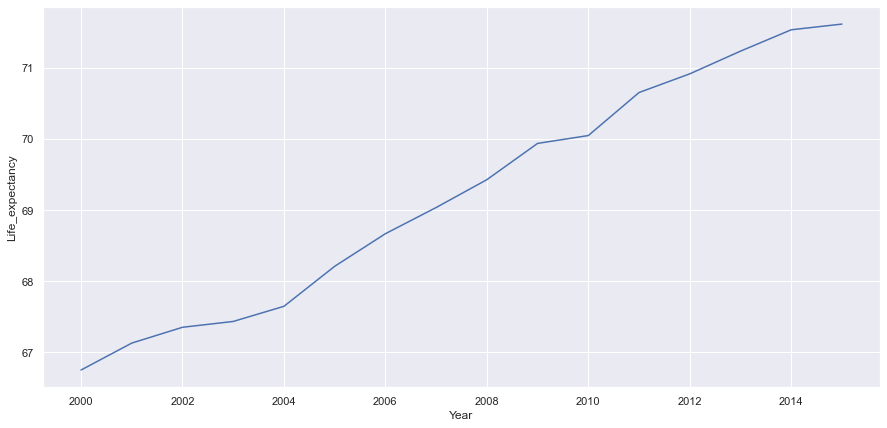

<IPython.core.display.Javascript object>

In [227]:
# average life expectancy over the years
plt.figure(figsize=(15, 7))
sns.lineplot(x="Year", y="Life_expectancy", data=df, ci=None)
plt.show()

* Overall life expectancy of the world population is increasing over the years.

## Data Preprocessing (contd.)

### Column binning

- Let's group all countries into continents.

In [228]:
# Installing library to group coutries into continenets
# Please uncomment the next line and run the cell to install the library

# !pip install pycountry-convert

<IPython.core.display.Javascript object>

In [229]:
# Let's group coutries into continents
import pycountry_convert as pc


def country_to_continent(country_name):
    """
    country_name : name of country for which continent is needed
    """
    if "(" in country_name:
        country_name = country_name.split(" ")[0]
    country_alpha2 = pc.country_name_to_country_alpha2(country_name)
    country_continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
    country_continent_name = pc.convert_continent_code_to_continent_name(
        country_continent_code
    )
    return country_continent_name

<IPython.core.display.Javascript object>

In [240]:
for country in df["Country"].unique():

    try:
        country_to_continent(country)
    except Exception as e:
        print(country, "failed.")
        print(e)

Republic of Korea failed.
"Invalid Country Name: 'Republic of Korea'"
The former Yugoslav republic of Macedonia failed.
"Invalid Country Name: 'The former Yugoslav republic of Macedonia'"
Timor-Leste failed.
"Invalid Country Alpha-2 code: 'TL'"


<IPython.core.display.Javascript object>

In [230]:
df["Country"].apply(country_to_continent)

KeyError: "Invalid Country Name: 'Republic of Korea'"

<IPython.core.display.Javascript object>

* Above error is arising because names of the countries are different from what the library has. 
* In order to resolve this, we looked at all country names that caused this error and hard-coded them as shown below.

In [236]:
# hard-coding the continent names of those countries which were giving error with country_to_continent function
def hard_coded_country_to_continent(cn):
    if cn == "Republic of Korea":
        return "Asia"
    elif cn == "The former Yugoslav republic of Macedonia":
        return "Europe"
    elif cn == "Timor-Leste":
        return "Asia"
    else:
        return country_to_continent(cn)


df["Country"].apply(hard_coded_country_to_continent)

0         Asia
1         Asia
2         Asia
3         Asia
4         Asia
         ...  
2933    Africa
2934    Africa
2935    Africa
2936    Africa
2937    Africa
Name: Country, Length: 2928, dtype: object

<IPython.core.display.Javascript object>

In [242]:
# mapping every country to its continent
df["Continent"] = df["Country"].apply(hard_coded_country_to_continent)

<IPython.core.display.Javascript object>

In [243]:
# let us look at unique continents
print(df["Continent"].unique())

['Asia' 'Europe' 'Africa' 'North America' 'South America' 'Oceania']


<IPython.core.display.Javascript object>

## EDA (contd.)

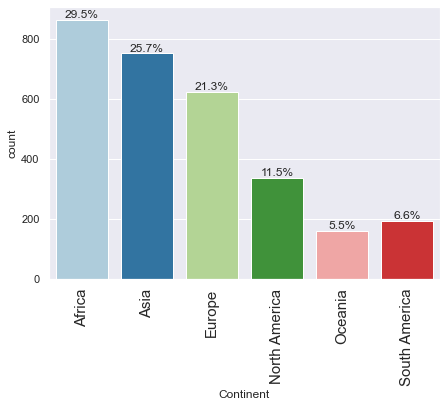

<IPython.core.display.Javascript object>

In [244]:
labeled_barplot(df, "Continent", perc=True)

**Observations**

- More than 75% of the data points are from Africa, Asia, and Europe.
- Oceania accounts for only 5.5% of the data points.

***Life_expectancy* vs *Adult_Mortality* vs *Continent***

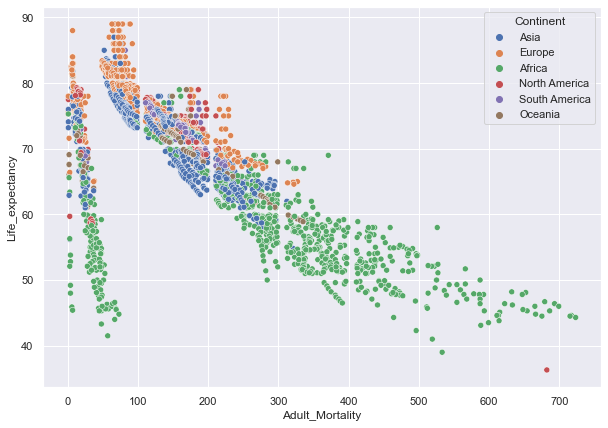

<IPython.core.display.Javascript object>

In [245]:
plt.figure(figsize=(10, 7))
sns.scatterplot(y="Life_expectancy", x="Adult_Mortality", hue="Continent", data=df)
plt.show()

* Many European and some Asian countries have had life expectancy higher than 80 years.
* Most of the African countries have higher adult mortality and life expectancy lower than 65 years.

**Median *Life_expectancy* by *Country* and *Status***

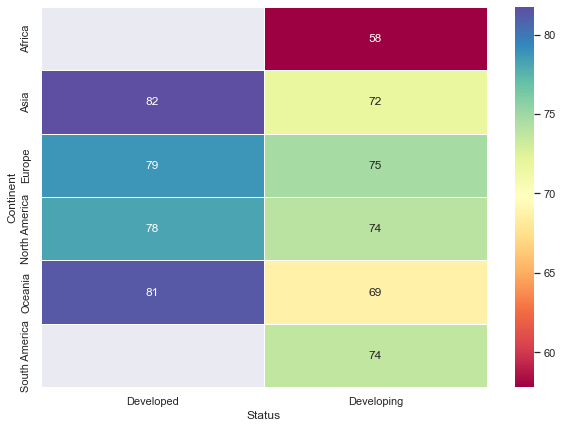

<IPython.core.display.Javascript object>

In [246]:
df_hm = df.pivot_table(
    index="Continent", columns="Status", values="Life_expectancy", aggfunc=np.median
)

# Draw a heatmap
f, ax = plt.subplots(figsize=(10, 7))
sns.heatmap(df_hm, cmap="Spectral", linewidths=0.5, annot=True, ax=ax)
plt.show()

- Developed countries from Asia have higher life expectancy than developed countries from Europe and North America.

***Life_expectancy* vs *Continent* vs *Status***

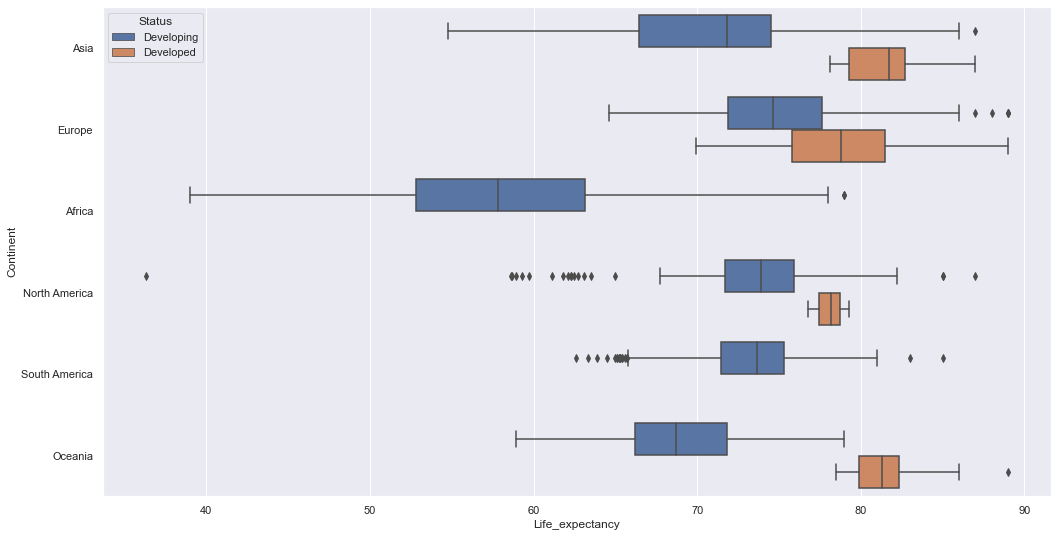

<IPython.core.display.Javascript object>

In [247]:
plt.figure(figsize=(17, 9))
sns.boxplot(y="Continent", x="Life_expectancy", data=df, hue="Status")
plt.show()

**Observations**

- The life expectancy in the developed countries is much higher than the developing countries.

- The median value of life expectancy (approximately as can be seen from the boxplot) are as follows:
     - Developing: 69 years
     - Developed: 78 years

**Let's convert the *object* type columns to *category* type**

In [248]:
df["Country"] = df["Country"].astype("category")
df["Status"] = df["Status"].astype("category")
df["Continent"] = df["Continent"].astype("category")

<IPython.core.display.Javascript object>

## Data Preprocessing (contd.)

### Outlier Detection

- Let's look at outliers in every numerical column

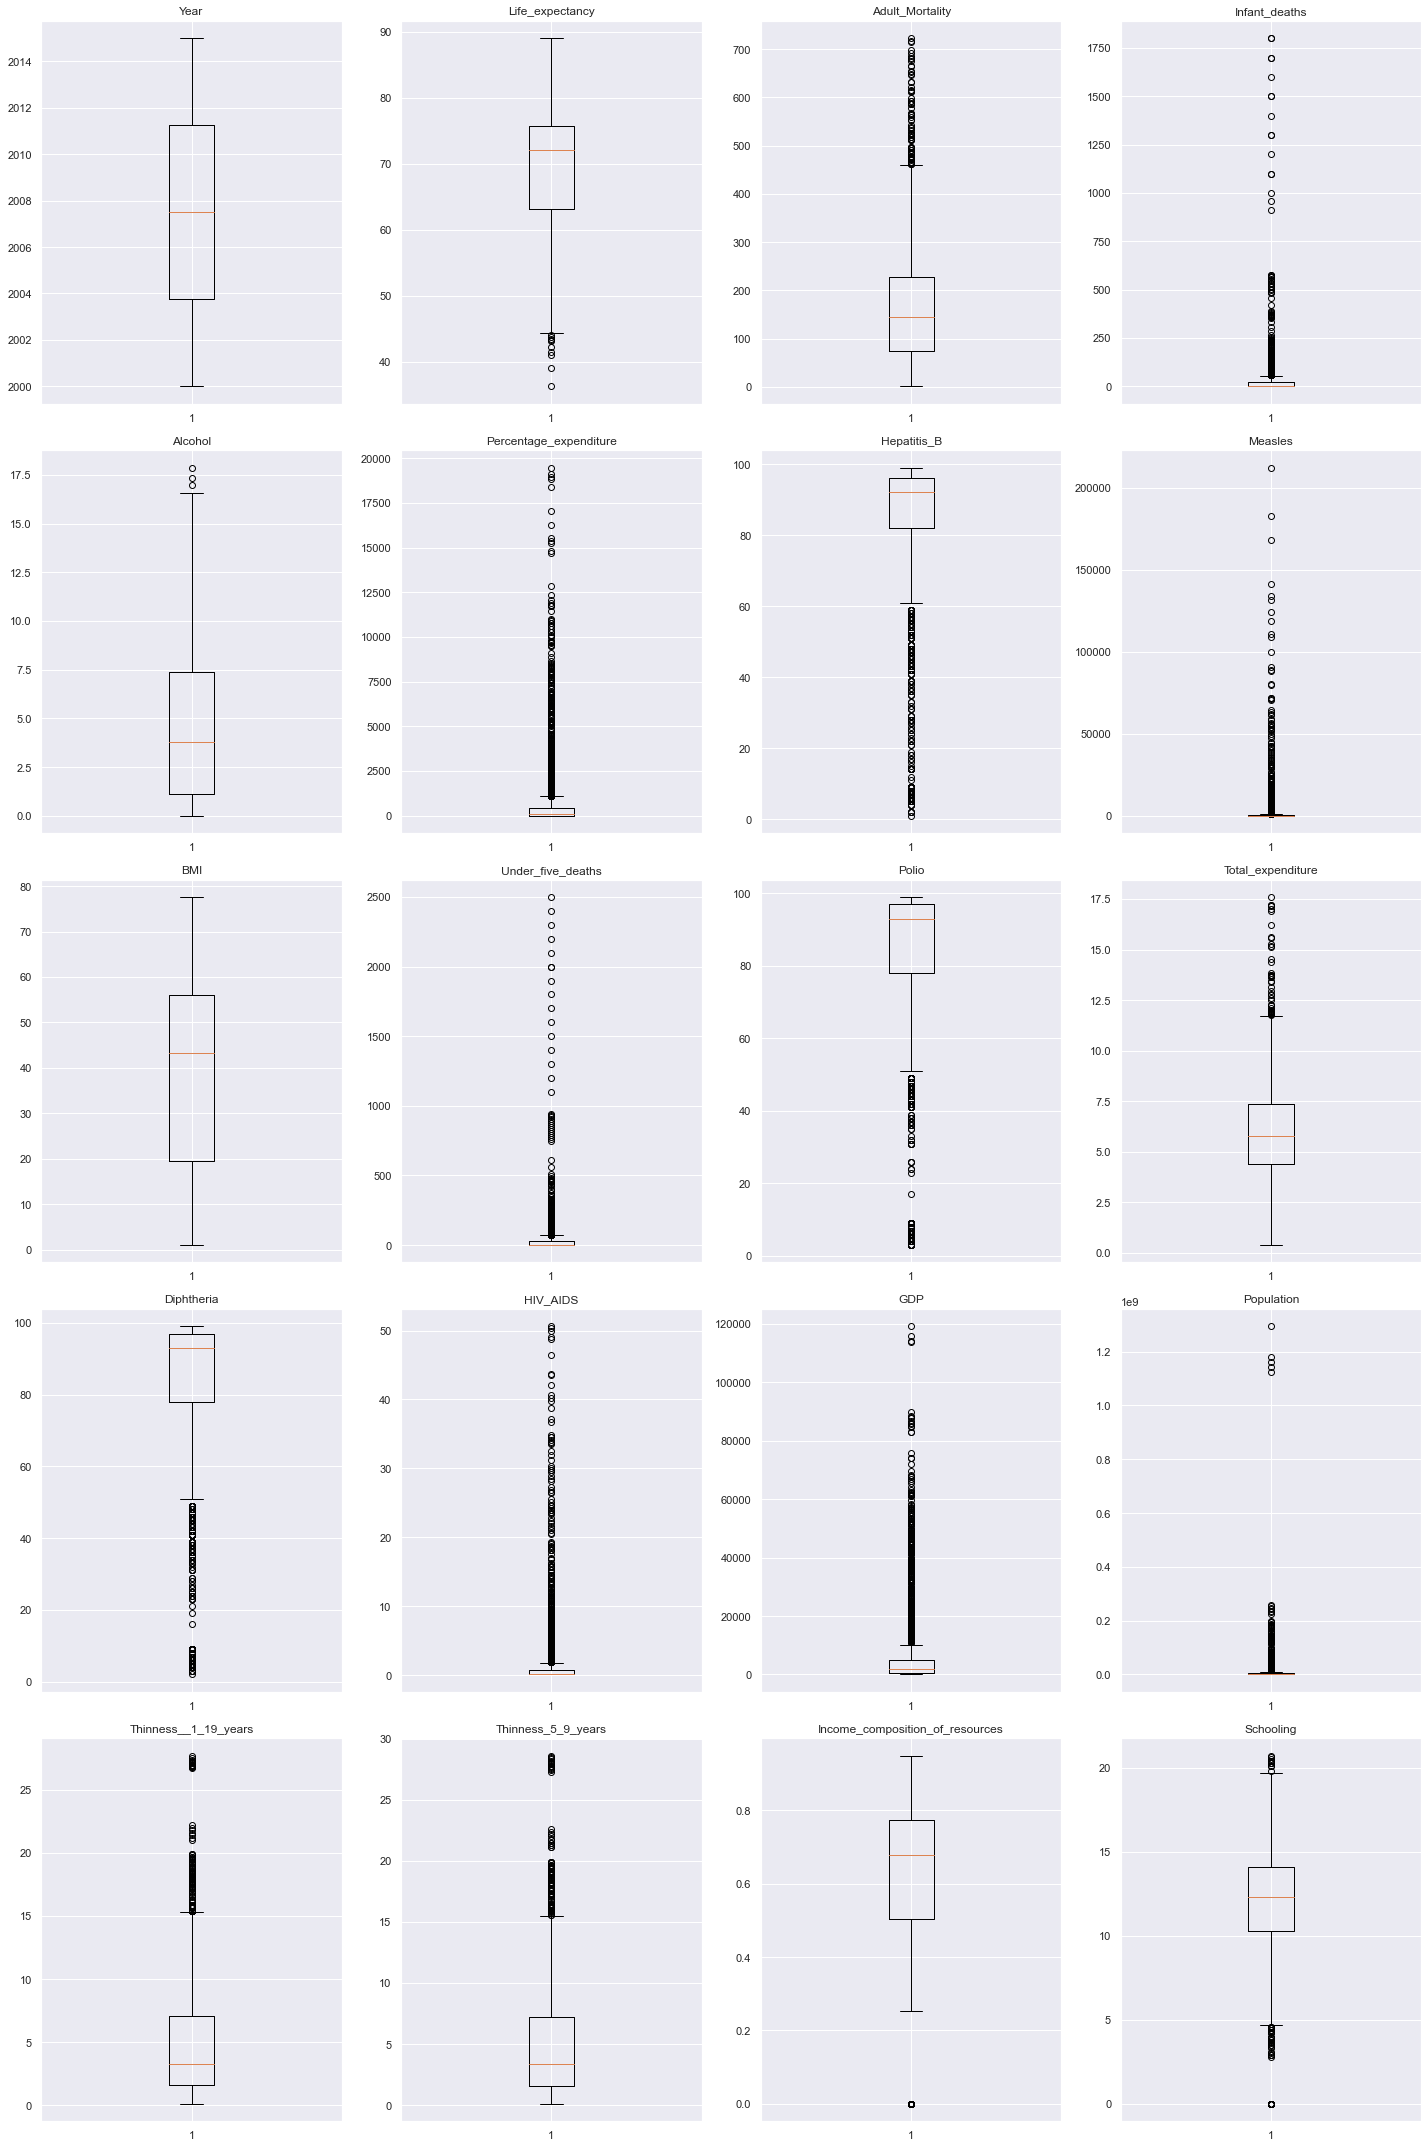

<IPython.core.display.Javascript object>

In [249]:
# let's plot the boxplots of all columns to check for outliers
plt.figure(figsize=(20, 30))

for i, variable in enumerate(num_cols):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

**Observations**

* There are lower outliers in *Life_expectancy*, *Hepatitis_B*, *Polio*, *Diphtheria*, *Income_composition_of_resources* and *Schooling*.

* There are no outliers in *BMI*.

* All other numerical columns have upper outliers.

* We will treat these outliers as these might adversely affect the predictive power of linear model. However, in real life, these outliers may be due to non-linear pattern in the data or can be important information.

* Sometimes outliers in the independent variable can adversely impact the linear model. This can be checked by building the model with and without outliers and comparing the model performances.

### Outlier Treatment

- Let's treat outliers in the data by flooring and capping.

In [250]:
def treat_outliers(df, col):
    """
    treats outliers in a variable
    col: str, name of the numerical variable
    df: dataframe
    col: name of the column
    """
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR

    # all the values smaller than Lower_Whisker will be assigned the value of Lower_Whisker
    # all the values greater than Upper_Whisker will be assigned the value of Upper_Whisker
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker)

    return df


def treat_outliers_all(df, col_list):
    """
    treat outlier in all numerical variables
    col_list: list of numerical variables
    df: data frame
    """
    for c in col_list:
        df = treat_outliers(df, c)

    return df

<IPython.core.display.Javascript object>

In [251]:
# treating the outliers
numerical_col = df.select_dtypes(include=np.number).columns.tolist()
df = treat_outliers_all(df, numerical_col)

<IPython.core.display.Javascript object>

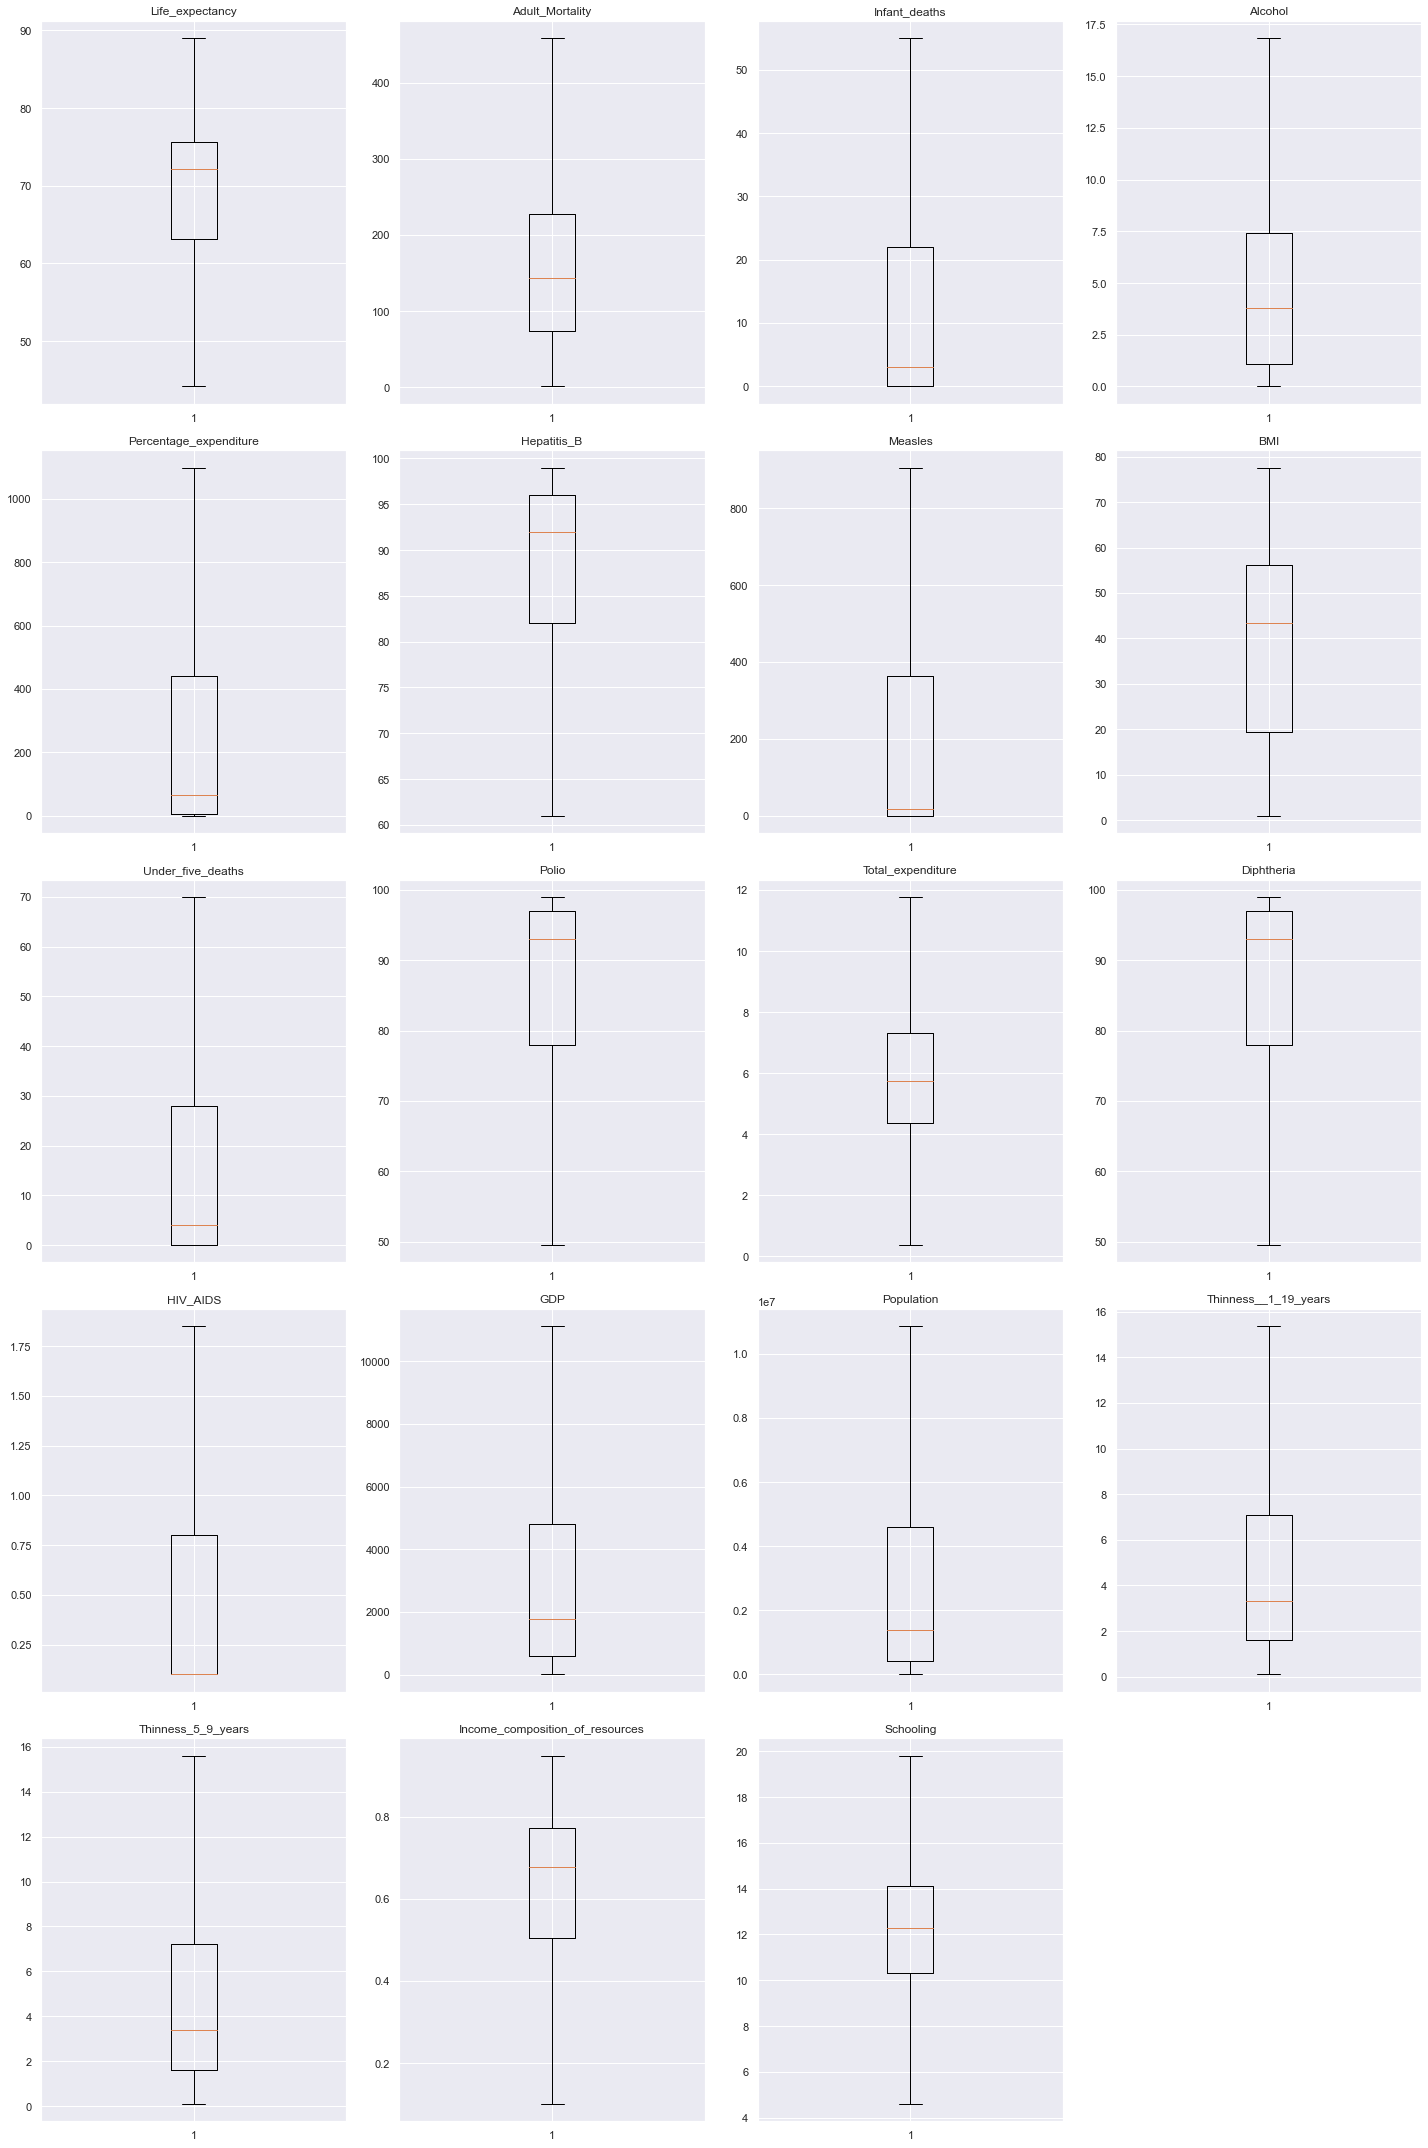

<IPython.core.display.Javascript object>

In [252]:
# let's look at the boxplots to see if the outliers have been treated or not
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numeric_columns):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

## Linear Model Building

1. We want to predict the life expectancy.

2. Before we proceed to build a model, we'll have to encode categorical features.

3. We'll split the data into train and test to be able to evaluate the model that we build on the train data.

4. We will build a Linear Regression model using the train data and then check it's performance.

In [253]:
# defining X and y variables
X = df.drop(["Life_expectancy", "Country"], axis=1)
y = df["Life_expectancy"]

display(X.head())
display(y.head())

,Year,Status,Adult_Mortality,Infant_deaths,Alcohol,Percentage_expenditure,Hepatitis_B,Measles,BMI,Under_five_deaths,...,Total_expenditure,Diphtheria,HIV_AIDS,GDP,Population,Thinness__1_19_years,Thinness_5_9_years,Income_composition_of_resources,Schooling,Continent
0,2015,Developing,263.000,55.000,0.010,71.280,65.000,905.625,19.100,70.000,...,8.160,65.000,0.100,584.259,10854761.125,15.350,15.600,0.479,10.100,Asia
1,2014,Developing,271.000,55.000,0.010,73.524,62.000,492.000,18.600,70.000,...,8.180,62.000,0.100,612.697,327582.000,15.350,15.600,0.476,10.000,Asia
2,2013,Developing,268.000,55.000,0.010,73.219,64.000,430.000,18.100,70.000,...,8.130,64.000,0.100,631.745,10854761.125,15.350,15.600,0.470,9.900,Asia
3,2012,Developing,272.000,55.000,0.010,78.184,67.000,905.625,17.600,70.000,...,8.520,67.000,0.100,669.959,3696958.000,15.350,15.600,0.463,9.800,Asia
4,2011,Developing,275.000,55.000,0.010,7.097,68.000,905.625,17.200,70.000,...,7.870,68.000,0.100,63.537,2978599.000,15.350,15.600,0.454,9.500,Asia


0   65.000
1   59.900
2   59.900
3   59.500
4   59.200
Name: Life_expectancy, dtype: float64

<IPython.core.display.Javascript object>

In [254]:
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)
X.head()

,Year,Adult_Mortality,Infant_deaths,Alcohol,Percentage_expenditure,Hepatitis_B,Measles,BMI,Under_five_deaths,Polio,...,Thinness__1_19_years,Thinness_5_9_years,Income_composition_of_resources,Schooling,Status_Developing,Continent_Asia,Continent_Europe,Continent_North America,Continent_Oceania,Continent_South America
0,2015,263.000,55.000,0.010,71.280,65.000,905.625,19.100,70.000,49.500,...,15.350,15.600,0.479,10.100,1,1,0,0,0,0
1,2014,271.000,55.000,0.010,73.524,62.000,492.000,18.600,70.000,58.000,...,15.350,15.600,0.476,10.000,1,1,0,0,0,0
2,2013,268.000,55.000,0.010,73.219,64.000,430.000,18.100,70.000,62.000,...,15.350,15.600,0.470,9.900,1,1,0,0,0,0
3,2012,272.000,55.000,0.010,78.184,67.000,905.625,17.600,70.000,67.000,...,15.350,15.600,0.463,9.800,1,1,0,0,0,0
4,2011,275.000,55.000,0.010,7.097,68.000,905.625,17.200,70.000,68.000,...,15.350,15.600,0.454,9.500,1,1,0,0,0,0


<IPython.core.display.Javascript object>

In [255]:
# splitting the data in 70:30 ratio for train to test data

x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

<IPython.core.display.Javascript object>

In [264]:
pd.concat(
    [
        x_train.median(),
        x_test.median(),
        df.drop(["Life_expectancy", "Country"], axis=1).median(),
    ],
    axis=1,
)

C:\Users\dakas\AppData\Local\Temp/ipykernel_18508/2567095415.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  pd.concat([x_train.median(), x_test.median(), df.drop(["Life_expectancy", "Country"], axis=1).median()], axis=1)


,0,1,2
Year,2008.000,2007.000,2007.500
Adult_Mortality,144.000,142.000,144.000
Infant_deaths,3.000,3.000,3.000
Alcohol,3.770,3.770,3.770
Percentage_expenditure,67.639,62.220,65.611
Hepatitis_B,92.000,92.000,92.000
Measles,15.000,20.000,17.000
BMI,43.350,43.350,43.350
Under_five_deaths,4.000,4.000,4.000
Polio,93.000,93.000,93.000


<IPython.core.display.Javascript object>

In [265]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 2049
Number of rows in test data = 879


<IPython.core.display.Javascript object>

In [266]:
# fitting the model on the train data (70% of the whole data)
from sklearn.linear_model import LinearRegression

linearregression = LinearRegression()
linearregression.fit(x_train, y_train)

LinearRegression()

<IPython.core.display.Javascript object>

**Let's check the coefficients and intercept of the model.**

In [114]:
coef_df = pd.DataFrame(
    np.append(linearregression.coef_, linearregression.intercept_),
    index=x_train.columns.tolist() + ["Intercept"],
    columns=["Coefficients"],
)

coef_df

,Coefficients
Year,0.117
Adult_Mortality,-0.014
Infant_deaths,0.242
Alcohol,-0.091
Percentage_expenditure,0.002
Hepatitis_B,-0.033
Measles,0.000
BMI,-0.001
Under_five_deaths,-0.237
Polio,0.029


<IPython.core.display.Javascript object>

**Let's check the performance of the model using different metrics.**

* We will be using metric functions defined in sklearn for RMSE, MAE, and $R^2$.
* We will define a function to calculate MAPE and adjusted $R^2$.
    - The mean absolute percentage error (MAPE) measures the accuracy of predictions as a percentage, and can be calculated as the average absolute percent error for each predicted value minus actual values divided by actual values. It works best if there are no extreme values in the data and none of the actual values are 0.
    
* We will create a function which will print out all the above metrics in one go.

In [267]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [268]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
linearregression_train_perf = model_performance_regression(
    linearregression, x_train, y_train
)
linearregression_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,3.470,2.585,0.865,0.863,3.929


<IPython.core.display.Javascript object>

In [269]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
linearregression_test_perf = model_performance_regression(
    linearregression, x_test, y_test
)
linearregression_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,3.506,2.670,0.867,0.864,4.095


<IPython.core.display.Javascript object>

**Observations**

- The training $R^2$ is 86.5%, indicating that the model explains 86.5% of the variation in the train data. So, the model is not underfitting.

- MAE and RMSE on the train and test sets are comparable, which shows that the model is not overfitting.

- MAE indicates that our current model is able to predict life expectancy within a mean error of 2.7 years on the test data.

- MAPE on the test set suggests we can predict within 4.1% of the life expectancy.

## Linear Regression using statsmodels

- Let's build a linear regression model using statsmodels.

In [270]:
# unlike sklearn, statsmodels does not add a constant to the data on its own
# we have to add the constant manually
x_train1 = sm.add_constant(x_train)
# adding constant to the test data
x_test1 = sm.add_constant(x_test)

olsmod0 = sm.OLS(y_train, x_train1).fit()
print(olsmod0.summary())

                            OLS Regression Results                            
Dep. Variable:        Life_expectancy   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     518.1
Date:                Sun, 10 Oct 2021   Prob (F-statistic):               0.00
Time:                        19:39:44   Log-Likelihood:                -5456.5
No. Observations:                2049   AIC:                         1.096e+04
Df Residuals:                    2023   BIC:                         1.111e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

C:\Users\dakas\miniconda3\envs\great_learning\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<IPython.core.display.Javascript object>

**Observations**

- Negative values of the coefficient show that *Life_expectancy* decreases with the increase of corresponding attribute value.

- Positive values of the coefficient show that *Life_expectancy* increases with the increase of corresponding attribute value.

- p-value of a variable indicates if the variable is significant or not. If we consider the significance level to be 0.05 (5%), then any variable with a p-value less than 0.05 would be considered significant.

- But these variables might contain multicollinearity, which will affect the p-values.

- So, we need to deal with multicollinearity and check the other assumptions of linear regression first, and then look at the p-values.

## Checking Linear Regression Assumptions

We will be checking the following Linear Regression assumptions:

1. **No Multicollinearity**

2. **Linearity of variables**

3. **Independence of error terms**

4. **Normality of error terms**

5. **No Heteroscedasticity**

### TEST FOR MULTICOLLINEARITY

* Multicollinearity occurs when predictor variables in a regression model are correlated. This correlation is a problem because predictor variables should be independent. If the correlation between variables is high, it can cause problems when we fit the model and interpret the results. When we have multicollinearity in the linear model, the coefficients that the model suggests are unreliable.

* There are different ways of detecting (or testing) multicollinearity. One such way is by using the Variance Inflation Factor, or VIF.

* **Variance  Inflation Factor (VIF)**:  Variance inflation factors measure the inflation in the variances of the regression parameter estimates due to collinearities that exist among the predictors. It is a measure of how much the variance of the estimated regression coefficient $\beta_k$ is "inflated" by the existence of correlation among the predictor variables in the model.
    - If VIF is 1, then there is no correlation among the $k$th predictor and the remaining predictor variables, and hence, the variance of $\beta_k$ is not inflated at all.

* **General Rule of thumb**:
    - If VIF is between 1 and 5, then there is low multicollinearity.
    - If VIF is between 5 and 10, we say there is moderate multicollinearity.
    - If VIF is exceeding 10, it shows signs of high multicollinearity.

In [271]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i, _ in enumerate(predictors.columns)
    ]
    return vif.sort_values("VIF")

<IPython.core.display.Javascript object>

In [272]:
checking_vif(x_train1)

,feature,VIF
1,Year,1.204
11,Total_expenditure,1.244
15,Population,1.257
6,Hepatitis_B,1.567
2,Adult_Mortality,1.782
7,Measles,1.836
25,Continent_South America,1.938
8,BMI,1.944
24,Continent_Oceania,1.991
23,Continent_North America,2.215


<IPython.core.display.Javascript object>

* *Thinness__1_19_years* and *Thinness__5_9_years* have VIF slightly greater than 5.
* *Infant_deaths* and *Under_five_deaths* have a VIF score of much greater than 5.
* Clearly these 2 variables are correlated with each other.
* This does seem to make intuitive sense because the number of infant death and under-5 deaths would have a significant overlap.

### Removing Multicollinearity

To remove multicollinearity

1. Drop every column one by one that has a VIF score greater than 5.
2. Look at the adjusted R-squared and RMSE of all these models.
3. Drop the variable that makes the least change in adjusted R-squared.
4. Check the VIF scores again.
5. Continue till you get all VIF scores under 5.

Let's define a function that will help us do this.

In [273]:
def treating_multicollinearity(predictors, target, high_vif_columns):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """
    # empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []

    # build ols models by dropping one of the high VIF columns at a time
    # store the adjusted R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
        # defining the new train set
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        # create the model
        olsmodel = sm.OLS(target, train).fit()

        # adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    # creating a dataframe for the results
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False,)
    temp.reset_index(drop=True, inplace=True)

    return temp

<IPython.core.display.Javascript object>

In [274]:
col_list = [
    "dont_drop_anything",
    "Infant_deaths",
    "Under_five_deaths",
    "Thinness__1_19_years",
    "Thinness_5_9_years",
]

res = treating_multicollinearity(x_train1, y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,Thinness__1_19_years,0.863,3.491
1,dont_drop_anything,0.863,3.492
2,Thinness_5_9_years,0.863,3.497
3,Infant_deaths,0.861,3.517
4,Under_five_deaths,0.860,3.531


<IPython.core.display.Javascript object>

* Dropping *Under_five_deaths* would have the maximum impact on the predictive power of the model (amongst the variables being considered).
* We'll drop *Thinness__1_19_years* and check the VIF again.

In [275]:
col_to_drop = "Thinness__1_19_years"
x_train2 = x_train1.loc[:, ~x_train1.columns.str.startswith(col_to_drop)]
x_test2 = x_test1.loc[:, ~x_test1.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(x_train2)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  Thinness__1_19_years


,feature,VIF
1,Year,1.204
11,Total_expenditure,1.243
15,Population,1.257
6,Hepatitis_B,1.566
2,Adult_Mortality,1.780
7,Measles,1.830
24,Continent_South America,1.935
8,BMI,1.943
23,Continent_Oceania,1.979
16,Thinness_5_9_years,2.108


<IPython.core.display.Javascript object>

* Dropping *Thinness__1_19_years* has brought the VIF of *Thinness_5_9_years* below 5.
* *Infant_deaths* and *Under_five_deaths* still have a VIF score of much greater than 5.

In [276]:
col_list = [
    "dont_drop_anything",
    "Infant_deaths",
    "Under_five_deaths",
]

res = treating_multicollinearity(x_train2, y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,dont_drop_anything,0.863,3.491
1,Infant_deaths,0.861,3.516
2,Under_five_deaths,0.860,3.531


<IPython.core.display.Javascript object>

- We will drop *Infant_deaths*.

In [277]:
col_to_drop = "Infant_deaths"
x_train3 = x_train2.loc[:, ~x_train2.columns.str.startswith(col_to_drop)]
x_test3 = x_test2.loc[:, ~x_test2.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(x_train3)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  Infant_deaths


,feature,VIF
1,Year,1.203
10,Total_expenditure,1.243
14,Population,1.254
5,Hepatitis_B,1.559
2,Adult_Mortality,1.780
6,Measles,1.830
23,Continent_South America,1.917
7,BMI,1.936
22,Continent_Oceania,1.973
15,Thinness_5_9_years,2.105


<IPython.core.display.Javascript object>

**The above predictors have no multicollinearity and the assumption is satisfied.**

Let's check the model performance.

In [278]:
olsmod1 = sm.OLS(y_train, x_train3).fit()
print(olsmod1.summary())

                            OLS Regression Results                            
Dep. Variable:        Life_expectancy   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     554.0
Date:                Sun, 10 Oct 2021   Prob (F-statistic):               0.00
Time:                        19:49:45   Log-Likelihood:                -5471.7
No. Observations:                2049   AIC:                         1.099e+04
Df Residuals:                    2025   BIC:                         1.113e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

<IPython.core.display.Javascript object>

**Observations**

- We can see that adj. R-squared has dropped from 0.863 to 0.861, which shows that the dropped columns did not have much effect on the model.
- As there is no multicollinearity, we can look at the p-values of predictor variables to check their significance.


- *Measles*, *BMI*, *Total_expenditure*, *GDP*, *Population*, and *Continent_Oceania* have p-value > 0.05. So, they are not significant and we'll drop them.
- But sometimes p-values change after dropping a variable. So, we'll not drop all variables at once.
- Instead, we will do the following:
    - Build a model, check the p-values of the variables, and drop the column with the highest p-value.
    - Create a new model without the dropped feature, check the p-values of the variables, and drop the column with the highest p-value.
    - Repeat the above two steps till there are no columns with p-value > 0.05.

The above process can also be done manually by picking one variable at a time that has a high p-value, dropping it, and building a model again. But that might be a little tedious and using a loop will be more efficient.

In [280]:
# initial list of columns
cols = x_train3.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = x_train3[cols]

    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:  # elif max_p_value <= 0.05:
        break

selected_features = cols
print(selected_features)

['const', 'Year', 'Adult_Mortality', 'Alcohol', 'Percentage_expenditure', 'Hepatitis_B', 'Under_five_deaths', 'Polio', 'Diphtheria', 'HIV_AIDS', 'Population', 'Thinness_5_9_years', 'Income_composition_of_resources', 'Schooling', 'Status_Developing', 'Continent_Asia', 'Continent_Europe', 'Continent_North America', 'Continent_South America']


<IPython.core.display.Javascript object>

In [281]:
x_train4 = x_train3[selected_features]
x_test4 = x_test3[selected_features]

<IPython.core.display.Javascript object>

In [282]:
x_train4.shape

(2049, 19)

<IPython.core.display.Javascript object>

In [283]:
olsmod2 = sm.OLS(y_train, x_train4).fit()
print(olsmod2.summary())

                            OLS Regression Results                            
Dep. Variable:        Life_expectancy   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     707.8
Date:                Sun, 10 Oct 2021   Prob (F-statistic):               0.00
Time:                        19:56:05   Log-Likelihood:                -5474.0
No. Observations:                2049   AIC:                         1.099e+04
Df Residuals:                    2030   BIC:                         1.109e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

<IPython.core.display.Javascript object>

**Now no feature has p-value greater than 0.05, so we'll consider the features in *x_train4* as the final ones and *olsmod2* as final model.**

**Observations**

* Now adjusted R-squared is 0.861, i.e., our model is able to explain ~86% of the variance. This shows that the model is good.
* The adjusted R-squared in *olsmod0* (where we considered all the variables) was 0.863. This shows that the variables we dropped were not affecting the model much.

**Now we'll check the rest of the assumptions on *olsmod2*.**

2. **Linearity of variables**

3. **Independence of error terms**

4. **Normality of error terms**

5. **No Heteroscedasticity**

### TEST FOR LINEARITY AND INDEPENDENCE

**Why the test?**

* Linearity describes a straight-line relationship between two variables, predictor variables must have a linear relation with the dependent variable.
* The independence of the error terms (or residuals) is important. If the residuals are not independent, then the confidence intervals of the coefficient estimates will be narrower and make us incorrectly conclude a parameter to be statistically significant.

**How to check linearity and independence?**

- Make a plot of fitted values vs residuals.
- If they don't follow any pattern, then we say the model is linear and residuals are independent.
- Otherwise, the model is showing signs of non-linearity and residuals are not independent.

**How to fix if this assumption is not followed?**

* We can try to transform the variables and make the relationships linear.

In [284]:
# let us create a dataframe with actual, fitted and residual values
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train  # actual values
df_pred["Fitted Values"] = olsmod2.fittedvalues  # predicted values
df_pred["Residuals"] = olsmod2.resid  # residuals

df_pred.head()

,Actual Values,Fitted Values,Residuals
1911,81.600,81.116,0.484
954,61.600,60.167,1.433
1049,72.100,72.721,-0.621
1714,67.000,63.606,3.394
2021,72.400,68.098,4.302


<IPython.core.display.Javascript object>

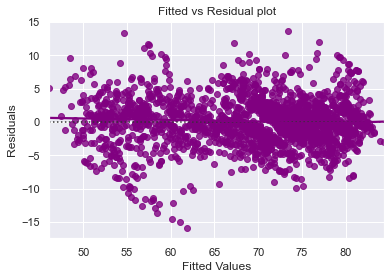

<IPython.core.display.Javascript object>

In [286]:
# let's plot the fitted values vs residuals

sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

* The scatter plot shows the distribution of residuals (errors) vs fitted values (predicted values).

* If there exist any pattern in this plot, we consider it as signs of non-linearity in the data and a pattern means that the model doesn't capture non-linear effects.

* **We see no pattern in the plot above. Hence, the assumptions of linearity and independence are satisfied.**

### TEST FOR NORMALITY

**Why the test?**

* Error terms, or residuals, should be normally distributed. If the error terms are not normally distributed, confidence intervals of the coefficient estimates may become too wide or narrow. Once confidence interval becomes unstable, it leads to difficulty in estimating coefficients based on minimization of least squares. Non-normality suggests that there are a few unusual data points that must be studied closely to make a better model.

**How to check normality?**

* The shape of the histogram of residuals can give an initial idea about the normality.
* It can also be checked via a Q-Q plot of residuals. If the residuals follow a normal distribution, they will make a straight line plot, otherwise not.
* Other tests to check for normality includes the Shapiro-Wilk test.
    - Null hypothesis: Residuals are normally distributed
    - Alternate hypothesis: Residuals are not normally distributed

**How to fix if this assumption is not followed?**

* We can apply transformations like log, exponential, arcsinh, etc. as per our data.

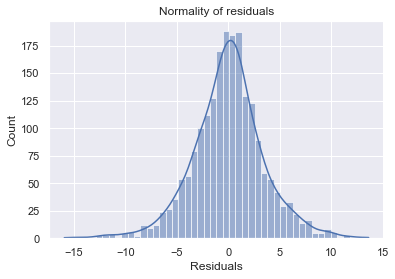

<IPython.core.display.Javascript object>

In [287]:
sns.histplot(data=df_pred, x="Residuals", kde=True)
plt.title("Normality of residuals")
plt.show()

- The histogram of residuals does have a bell shape.
- Let's check the Q-Q plot.

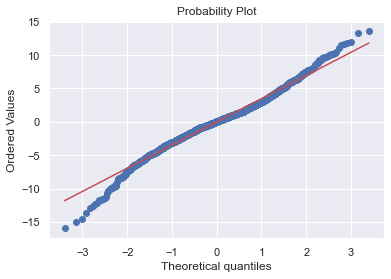

<IPython.core.display.Javascript object>

In [288]:
import pylab
import scipy.stats as stats

stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

- The residuals more or less follow a straight line except for the tails.
- Let's check the results of the Shapiro-Wilk test.

In [289]:
stats.shapiro(df_pred["Residuals"])

ShapiroResult(statistic=0.9825159311294556, pvalue=3.76515547120251e-15)

<IPython.core.display.Javascript object>

- Since p-value < 0.05, the residuals are not normal as per the Shapiro-Wilk test.
- Strictly speaking, the residuals are not normal.
- However, as an approximation, we can accept this distribution as close to being normal.
- **So, the assumption is satisfied.**

### TEST FOR HOMOSCEDASTICITY

* **Homoscedascity**: If the variance of the residuals is symmetrically distributed across the regression line, then the data is said to be homoscedastic.

* **Heteroscedascity**: If the variance is unequal for the residuals across the regression line, then the data is said to be heteroscedastic.

**Why the test?** 

* The presence of non-constant variance in the error terms results in heteroscedasticity. Generally, non-constant variance arises in presence of outliers.

**How to check for homoscedasticity?**

* The residual vs fitted values plot can be looked at to check for homoscedasticity. In the case of heteroscedasticity, the residuals can form an arrow shape or any other non-symmetrical shape.
* The goldfeldquandt test can also be used. If we get a p-value > 0.05 we can say that the residuals are homoscedastic. Otherwise, they are heteroscedastic.
    - Null hypothesis: Residuals are homoscedastic
    - Alternate hypothesis: Residuals have heteroscedasticity

**How to fix if this assumption is not followed?**

* Heteroscedasticity can be fixed by adding other important features or making transformations.

In [291]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], x_train4)
lzip(name, test)

[('F statistic', 0.8981917388317682), ('p-value', 0.9555755007717938)]

<IPython.core.display.Javascript object>

**Since p-value > 0.05, we can say that the residuals are homoscedastic. So, this assumption is satisfied.**

**Now that we have checked all the assumptions of linear regression and they are satisfied, we can move towards the prediction part.**

In [169]:
# predictions on the test set
pred = olsmod2.predict(x_test4)

df_pred_test = pd.DataFrame({"Actual": y_test, "Predicted": pred})
df_pred_test.sample(10, random_state=1)

,Actual,Predicted
1735,75.600,79.314
2532,81.000,80.403
2824,75.200,74.397
1210,67.500,70.159
1849,86.000,80.421
652,75.400,77.857
1901,55.000,51.123
1512,72.700,72.540
2831,68.300,70.727
1752,73.300,71.885


<IPython.core.display.Javascript object>

- We can observe here that our model has returned pretty good prediction results, and the actual and predicted values are comparable.

- We can also visualize comparison result as a bar graph.

**Note**: As the number of records is large, for representation purpose, we are taking a sample of 25 records only.

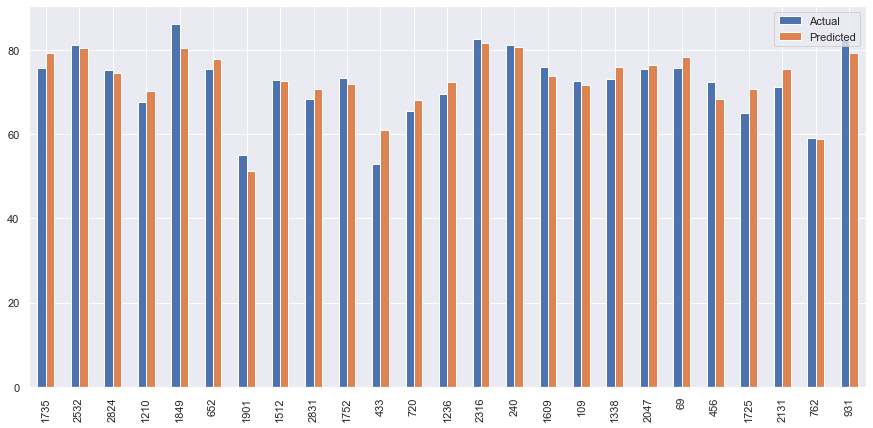

<IPython.core.display.Javascript object>

In [292]:
df1 = df_pred_test.sample(25, random_state=1)
df1.plot(kind="bar", figsize=(15, 7))
plt.show()

In [293]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmod2_train_perf = model_performance_regression(olsmod2, x_train4, y_train)
olsmod2_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,3.500,2.590,0.863,0.861,3.933


<IPython.core.display.Javascript object>

In [294]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmod2_test_perf = model_performance_regression(olsmod2, x_test4, y_test)
olsmod2_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,3.547,2.687,0.864,0.861,4.123


<IPython.core.display.Javascript object>

* The model is able to explain ~86% of the variation in the data, which is very good.

* The train and test RMSE and MAE are low and comparable. So, our model is not suffering from overfitting.

* The MAPE on the test set suggests we can predict within 4.1% of the life expectancy. 

* Hence, we can conclude the model *olsmod2* is good for prediction as well as inference purposes.

**Let's compare the initial model created with sklearn and the final statsmodels model.**

In [295]:
# training performance comparison

models_train_comp_df = pd.concat(
    [linearregression_train_perf.T, olsmod2_train_perf.T], axis=1,
)

models_train_comp_df.columns = [
    "Linear Regression sklearn",
    "Linear Regression statsmodels",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Linear Regression sklearn,Linear Regression statsmodels
RMSE,3.470,3.500
MAE,2.585,2.590
R-squared,0.865,0.863
Adj. R-squared,0.863,0.861
MAPE,3.929,3.933


<IPython.core.display.Javascript object>

In [296]:
# test performance comparison

models_test_comp_df = pd.concat(
    [linearregression_test_perf.T, olsmod2_test_perf.T], axis=1,
)

models_test_comp_df.columns = [
    "Linear Regression sklearn",
    "Linear Regression statsmodels",
]

print("Test performance comparison:")
models_test_comp_df

Test performance comparison:


,Linear Regression sklearn,Linear Regression statsmodels
RMSE,3.506,3.547
MAE,2.670,2.687
R-squared,0.867,0.864
Adj. R-squared,0.864,0.861
MAPE,4.095,4.123


<IPython.core.display.Javascript object>

* The performance of the two models is close to each other.

**Let's recreate the final statsmodels model and print it's summary to gain insights.**

In [297]:
olsmodel_final = sm.OLS(y_train, x_train4).fit()
print(olsmodel_final.summary())

                            OLS Regression Results                            
Dep. Variable:        Life_expectancy   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     707.8
Date:                Sun, 10 Oct 2021   Prob (F-statistic):               0.00
Time:                        20:11:58   Log-Likelihood:                -5474.0
No. Observations:                2049   AIC:                         1.099e+04
Df Residuals:                    2030   BIC:                         1.109e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

<IPython.core.display.Javascript object>

In [300]:
x_train4.describe().T

,count,mean,std,min,25%,50%,75%,max
const,2049.000,1.000,0.000,1.000,1.000,1.000,1.000,1.000
Year,2049.000,2007.550,4.633,2000.000,2004.000,2008.000,2012.000,2015.000
Adult_Mortality,2049.000,161.450,114.961,1.000,74.000,144.000,225.000,459.000
Alcohol,2049.000,4.573,3.929,0.010,1.110,3.770,7.400,16.839
Percentage_expenditure,2049.000,286.318,390.157,0.000,5.890,67.639,434.799,1099.255
Hepatitis_B,2049.000,86.935,12.355,61.000,82.000,92.000,96.000,99.000
Under_five_deaths,2049.000,17.923,25.175,0.000,0.000,4.000,27.000,70.000
Polio,2049.000,85.237,15.858,49.500,78.000,93.000,97.000,99.000
Diphtheria,2049.000,85.094,15.927,49.500,78.000,93.000,97.000,99.000
HIV_AIDS,2049.000,0.531,0.688,0.100,0.100,0.100,0.700,1.850


<IPython.core.display.Javascript object>

## Conclusions

1. Mortality rates (*Under_five_deaths* and *Adult_mortality*) come out to be very significant, as expected. As these two increase, the total life expectancy decreases, as is visible in the negative coefficient sign.


2. 1 unit increase in alcohol value (per capita consumption of pure alcohol in liters) leads to a decrease in life expectancy by 0.0849 years (~31 days!)


3. Diseases like *Hepatitis_B* and *HIV_AIDS* decrease the *Life_expectancy*.


4. Developing countries tend to have ~2.8 years less life expectancy compared to developed countries.


5. People from Asia, Europe, North America, and South America have a higher life expectancy than people of Africa or Oceania.
    - People from North America have ~4 years higher life expectancy than people of Africa or Oceania.


6. *Year*, *Percentage_expenditure*, *Polio* (refers to polio immunization), *Diptheria* (refers to diptheria immunization), *Income*, and *Schooling* have positive coefficients. So, as they increase, life expectancy also increases.